# Analyze SaD (Stasis and Decline)

## Imports

In [1]:
#Shawn Schwartz
#Alfaro Lab UCLA, 2019
#shawnschwartz@ucla.edu
import os
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC

## Declare Functions

In [9]:
def read_data(eigenvals, labels):
    #inputs:
    ##eigenvals: headerless .csv file path where rows represent an 
    ##n-row x m-column vector, and columns are each n-element 
    ##of the vector (row-wise)
    ##
    ##labels: .dat file path with a n-row x 1-column series of numerical
    ##integers indicative of the label/identifier of the corresponding
    ##row from the eigenvals input .csv file
    #
    #return:
    ##eigenvals_out: pandas dataframe of eigenvalues
    ##
    ##labels_out: numpy array of labels
    
    eigenvals_out = pd.read_csv(eigenvals, header=None)
    labels_out = np.loadtxt(labels)
    
    return eigenvals_out, labels_out

def prepare_data(eigenvals, labels):
    #inputs:
    ##eigenvals: pandas dataframe of eigenvalues
    ##
    ##labels: numpy array of labels
    #
    #return:
    ##eigenvals_out: numpy array of eigenvals
    ##
    ##labels_out: numpy array of eigenvals
    
    eigenvals_out = np.array(eigenvals)
    labels_out = np.array(labels)
    
    #check if numpy arrays are the same shape
    if (eigenvals_out.shape[0] == labels_out.shape[0]):
        print("Success: Eigenvalues Match Label Shape!")
        return eigenvals_out, labels_out
    else:
        print("Failure: Eigenvalues DON'T Match Label Shape!")
        exit()

def train_svm_data(eigenvals, labels, gamma):
    #inputs:
    ##eigenvals: numpy array of eigenvals
    ##
    ##labels: numpy array of eigenvals
    ##
    ##gamma: kernal function parameter defined in the SVC model
    #
    #return:
    ##clf: clf model
    ##
    ##clf_score: clf score from svm SVC fit/train
    
    clf = svm.SVC(gamma=gamma)
    clf.fit(eigenvals, labels)
    SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma=gamma, kernel='rbf',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
    clf_score = clf.score(eigenvals, labels)
    
    return clf, clf_score

def predict_stasis_decline(eigenvals, model):
    #inputs:
    ##eigenvals: headerless .csv file path where rows represent an 
    ##n-row x m-column vector, and columns are each n-element 
    ##of the vector (row-wise)
    ##
    ##model: clf model
    #
    #return:
    ##prediction: predicted numpy array of labels corresponding to newly
    ##input eigenvals headerless .csv file
    
    eigenvals_data = pd.read_csv(eigenvals, header=None)
    prediction = model.predict(np.array(eigenvals_data))
    
    print("\nPredicted labels for new eigenvalues:\n(0=Stasis; 1=Decline)")
    return prediction

def score_predictions(prediction, truths):
    #inputs:
    ##prediction_score: numpy array of predicted labels for new input data
    ##
    ##truths: .dat file path with a n-row x 1-column series of numerical
    ##integers indicative of the label/identifier of the corresponding
    ##row from the eigenvals input .csv file
    #
    #return:
    ##prediction_score: proportion correctly classified
    
    correct = 0
    total = len(prediction)
    truths = np.loadtxt(truths)
    
    for ii in range(0,total):
        if prediction[ii] == truths[ii]:
            correct = correct + 1
    
    prediction_score = correct/total

    print("\nPrediction accuracy score:")
    return prediction_score

## Main Program Run

In [155]:
#constant filepath values
DATAFILES_DIR = 'input_data'
EIGENVALS_TRAIN = os.path.join(DATAFILES_DIR, 'eigenvalues_train.csv')
LABELS_TRAIN = os.path.join(DATAFILES_DIR, 'labels_train.dat')
EIGENVALS_TEST = os.path.join(DATAFILES_DIR, 'eigenvalues_test.csv')
LABELS_TEST = os.path.join(DATAFILES_DIR, 'labels_test.dat')

#prep data
X,y = read_data(EIGENVALS_TRAIN, LABELS_TRAIN)
X,y = prepare_data(X, y)

#train svm model
clf_model, clf_train_score = train_svm_data(X, y, 'scale')
print("Clf score: ", clf_train_score)

#predict new data
predicted_labels = predict_stasis_decline(EIGENVALS_TEST, clf_model)

#score prediction accuracy
prediction_accuracy_score = score_predictions(predicted_labels, LABELS_TEST)
print(prediction_accuracy_score*100,"%")

Success: Eigenvalues Match Label Shape!
Clf score:  1.0

Predicted labels for new eigenvalues:
(0=Stasis; 1=Decline)

Prediction accuracy score:
50.0 %


In [11]:
print(predicted_labels)

[0. 0.]


In [156]:
clf = svm.SVC(gamma='scale')
clf.fit(X, y)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf_score = clf.score(X, y)
test = clf.predict(np.array(X))
#print(test)

X_test,y_test = read_data(EIGENVALS_TEST, LABELS_TEST)
X_test,y_test = prepare_data(X_test, y_test)
out_values = clf.predict(np.array(X_test))
#print(out_values)

import random
from math import floor
from random import shuffle

new_shuffled_X = []
new_shuffled_y = []

print(len(X))
#data = np.linspace(start=0, stop=140, num=140, retstep=1)
data = []
for ii in range(0,140):
    data.append(ii)
random.shuffle(data)
#print(data)

for ii in data:
    new_shuffled_X.append(X[ii])
    new_shuffled_y.append(y[ii])
    
#print(new_shuffled_X)
#print(new_shuffled_y)

clf = svm.SVC(gamma='scale')
clf.fit(new_shuffled_X, new_shuffled_y)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf_score = clf.score(new_shuffled_X, new_shuffled_y)

#############################
#new_prediction = clf.predict(np.array(X_test))
#new_prediction = clf.predict(np.array(new_shuffled_X))
#print(y_test)
#print(new_shuffled_y)
#print(new_prediction)
#############################

#############################
num_sims = 1000
#new_prediction = []
new_prediction = []
for ii in range(0,num_sims):
    new_prediction.extend(clf.predict(np.array(X_test)))
#############################
    #x_data_train.extend([objects])

print(len(new_prediction))
print(new_prediction)

#output_scores = score_predictions(new_prediction, new_shuffled_y)
#print(output_scores)
#test = clf.predict(np.array(X))


#pred = clf.decision_function(new_shuffled_X)
#print(pred)
#plt.contourf(new_shuffled_X, X , pred, alpha=1.0, cmap="RdYlGn", levels=np.linspace(pred.min(), pred.max(), 100))
#print(new_shuffled_X)
#plt.scatter(new_shuffled_X[:, 0], new_shuffled_X[:, 1], c=y, s=50, cmap='autumn')
#plt.scatter(new_shuffled_X, new_shuffled_X, c=y, s=50, cmap='autumn')
#plot_svc_decision_function(clf)


Success: Eigenvalues Match Label Shape!
140
60000
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [147]:


# function that draws decision boundaries 
def plotContours(clf, figname, delta = 0.01):
    
    x     = np.arange(-2.0, 5.001, delta)
    y     = np.arange(-2.0, 5.001, delta)
    X, Y = np.meshgrid(x, y)
    Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
    Z    = Z.reshape( X.shape )
    cset1 = pl.contourf( X, Y, Z, cmap=pl.get_cmap('jet'))
    pl.xlim(-2, 5)
    pl.ylim(-2, 5)
    pl.xlabel('X1')
    pl.ylabel('X2')
    pl.tight_layout()
    pl.savefig(figname, dpi=500)
    pl.show()
    
    return

#plotContours(clf, 'test.png')

In [61]:
import matplotlib.pyplot as plt
import pylab as pl

# function that draws decision boundaries 
def plotContours(clf, figname, delta = 0.0355):
    
    x     = np.arange(-2.0, 5.001, delta)
    print(len(x))
    y     = np.arange(-2.0, 5.001, delta)
    X, Y = np.meshgrid(x, y)
    Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
    Z    = Z.reshape( X.shape )
    cset1 = pl.contourf( X, Y, Z, cmap=pl.get_cmap('jet'))
    pl.xlim(-2, 5)
    pl.ylim(-2, 5)
    pl.xlabel('X1')
    pl.ylabel('X2')
    pl.tight_layout()
    pl.savefig(figname, dpi=500)
    pl.show()
    
    return

#plotContours(clf_model, 'testfig.png')

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 198)
    y = np.linspace(ylim[0], ylim[1], 140)
    Y, X = np.meshgrid(y, x)
    print(X.shape)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

(198, 140)


ValueError: X.shape[1] = 2 should be equal to 198, the number of features at training time

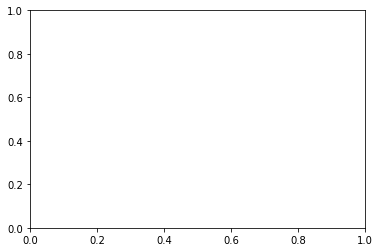

In [62]:
#plotContours(clf_model, 'testfig.png')
plot_svc_decision_function(clf_model)

In [56]:
print(X)
print(X.shape)
print(X.shape[1])

[[350.5217623 305.7633512 340.3641191 ... 304.4751631 160.1298255
  280.8928525]
 [343.788915  305.6515281 338.6492771 ... 304.2502824 159.3091728
  280.6812554]
 [341.7693197 305.343629  337.8714679 ... 304.1574859 349.8157188
  280.5769687]
 ...
 [289.0840986 125.463225  299.6709704 ... 126.5080273 301.8951063
  131.6285573]
 [289.0646385 125.2137243 299.6608197 ... 126.2125865 301.8867958
  131.4232045]
 [289.0413431 125.1282263 299.4088666 ... 125.6868903 301.8483927
  130.6666563]]
(140, 198)
198
